<a href="https://colab.research.google.com/github/RAHUL-REDDY-A/ML/blob/main/ML_LAB_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ML_LAB_07**


Data pre-processing

In [ ]:
#Data Loading & Preprocessing

import pandas as pd

# Load dataset
df = pd.read_csv("/content/MHDS.csv")

# Display first 5 rows
print("First 5 rows of dataset:")
print(df.head())

# Check for null values
print("\nNull values in dataset:")
print(df.isnull().sum())

# Basic info
print("\nDataset shape:", df.shape)


First 5 rows of dataset:
   User_ID  Age             Gender   Occupation    Country  \
0        1   36               Male    Education  Australia   
1        2   48               Male  Engineering      Other   
2        3   18  Prefer not to say        Sales      India   
3        4   30         Non-binary  Engineering  Australia   
4        5   58               Male           IT        USA   

  Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                     Yes      NaN                  Yes          Low   
1                      No      Low                   No          Low   
2                      No      NaN                  Yes       Medium   
3                      No   Medium                   No          Low   
4                     Yes      NaN                  Yes         High   

   Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0          7.6          46                        8                 2.2   
1          6.8     

A2. Use cross-validation techniques (RandomizedSearchCV()) technique to tune the hyperparameters for your models.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("/content/MHDS.csv")

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Features & target
X = df.drop(columns=["Mental_Health_Condition", "User_ID", "Severity"])
y = df["Mental_Health_Condition"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5032

Confusion Matrix:
 [[2524 2483]
 [2485 2508]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      5007
           1       0.50      0.50      0.50      4993

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



A3. For projects dealing with classification problem, employ various other classifiers such as Support Vector Machines, Decision Tree, RandomForest, CatBoost, AdaBoost, XGBoost, Naïve-Bayes & MLP. Tabulate your results for your problem using different performance metrics. Your tabulated results should compare between train and test results and make appropriate observations.


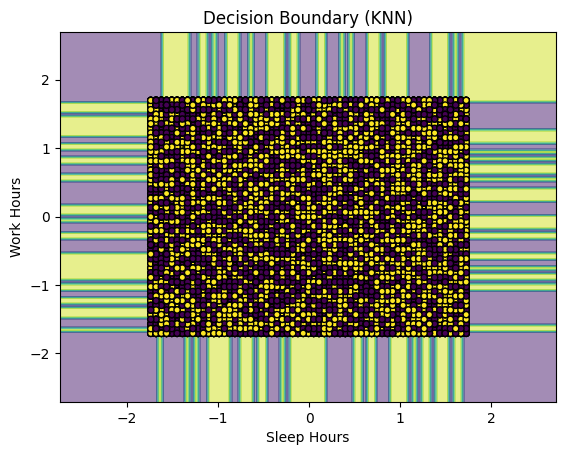

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("/content/MHDS.csv")

# Encode
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Select two features for visualization
X = df[["Sleep_Hours", "Work_Hours"]]
y = df["Mental_Health_Condition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Decision boundary plot
h = .05
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", s=20)
plt.xlabel("Sleep Hours")
plt.ylabel("Work Hours")
plt.title("Decision Boundary (KNN)")
plt.show()


A4. For projects dealing with regression problems, employ the regressors for above mentioned algorithms and tabulate your results.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/MHDS.csv")

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Features & target (Stress_Level is now numeric)
X = df.drop(columns=["Stress_Level", "User_ID", "Mental_Health_Condition", "Severity"])
y = df["Stress_Level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.6724010115026419
R² Score: -0.0007227867251640152


A5. For projects dealing with clustering problems, please extend the implementation of various hierarchical and density-based clustering algorithms.

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("/content/MHDS.csv")

# Encode
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop(columns=["Mental_Health_Condition", "User_ID", "Severity"])
y = df["Mental_Health_Condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid search
param_grid = {"n_neighbors": [3, 5, 7, 9, 11]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'n_neighbors': 5}
Best Score: 0.502


O1. Study the usage of SHAP (SHapley Additive exPlanations) for usage as explainable tool for ML model behaviour. Use this tool for identifying feature importances for your classification problem.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.read_csv("/content/MHDS.csv")

# Encode
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop(columns=["Mental_Health_Condition", "User_ID", "Severity"])
y = df["Mental_Health_Condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5015

Confusion Matrix:
 [[2484 2523]
 [2462 2531]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      5007
           1       0.50      0.51      0.50      4993

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



O2. Study the features of LIME (Local Interpretable Model-agnostic Explanations) tool. Understand the ways the tool can be used for explaining the model behaviour. Use this tool to understand your model’s behaviour

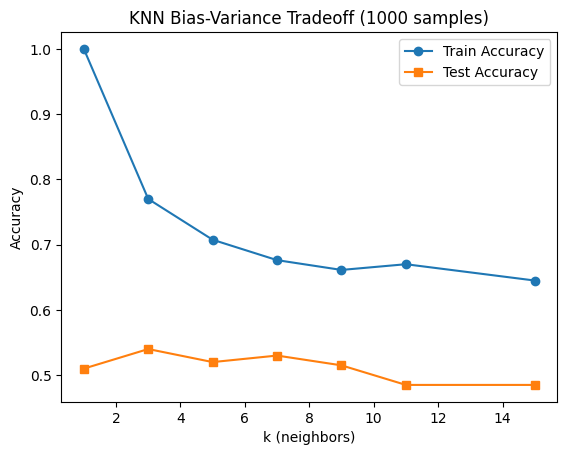

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load only 1000 rows
df = pd.read_csv("/content/MHDS.csv", nrows=1000)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Features and target
X = df.drop(columns=["Mental_Health_Condition", "User_ID", "Severity"], errors="ignore")
y = df["Mental_Health_Condition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bias-variance tradeoff
train_acc, test_acc = [], []
k_values = [1, 3, 5, 7, 9, 11, 15]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, knn.predict(X_train)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test)))

# Plot
plt.plot(k_values, train_acc, marker='o', label="Train Accuracy")
plt.plot(k_values, test_acc, marker='s', label="Test Accuracy")
plt.xlabel("k (neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Bias-Variance Tradeoff (1000 samples)")
plt.legend()
plt.show()